# Support Vector Regression

In [2]:
# If you run into ValueError when Predicting A New Result in the colab notebook for SVR please use the following snippet to reshape : 
# sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [20]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine Learning - Udemy/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [21]:
y = y.reshape(len(y),1)
print("y:\n{}".format(y))

y:
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [23]:
print("X:\n{}".format(X))
print("y:\n{}".format(y))

X:
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
y:
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training on Entire Set

In [24]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a New result

In [25]:
svr.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

In [37]:
print(sc_y.inverse_transform([svr.predict(sc_X.transform([[6.5]]))]))
print(sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])).reshape(-1,1)))

[[170370.0204065]]
[[170370.0204065]]


## Visualing the result

Text(0, 0.5, 'Salary')

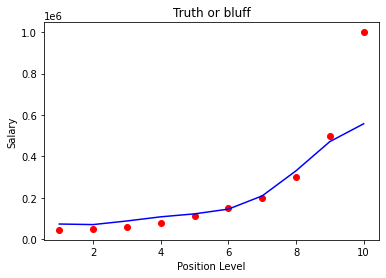

In [35]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr.predict(X).reshape(len(y),1)), color = 'blue')
plt.title("Truth or bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")